In [127]:
#practica de regresion lineal.

In [128]:
#1 Importar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [129]:
#2 leer archivo csv
df = pd.read_csv('defunciones_limpio.csv')

In [130]:
#3 Chequeamos que leyó el archivo
df.head()

,Unnamed: 0,region,jurisdiccion,sexo,grupo_etario,causa_defuncion,anio
0,0,Centro,Bs As,Varones,1,AFECC PERINATALES,2015
1,1,Centro,Bs As,Varones,1,"MALFORM CONGENITAS, DEFORM Y ANOM CROMOSOM...",2015
2,2,Centro,Bs As,Varones,1,"MALFORM CONGENITAS, DEFORM Y ANOM CROMOSOM...",2015
3,3,Centro,Bs As,Varones,1,ENF SISTEMA RESPIRATORIO,2015
4,4,Centro,Bs As,Varones,1,AFECC PERINATALES,2015


In [131]:
# "obj"
#analizar si el número de defunciones ha aumentado o disminuido a lo largo de los años
#calcular cuántas defunciones ocurrieron en un cierto período de tiempo para hombres y mujeres por causa de muerte específica. 
# analizar cómo el género y la causa de la defunción interactúan entre sí.

In [132]:
#se correge las columnas de sexo y causa_defuncion
#ya que estan como texto y no numericos hay una posibilidad de realizarlo con labelencoder y con one-hot(dummies)


In [133]:
# dummies "causa_defuncion"

In [134]:
causa_def = pd.get_dummies(df, columns=['causa_defuncion'], prefix=['causa'])

In [135]:
print(causa_def)

         Unnamed: 0  region jurisdiccion     sexo  grupo_etario  anio  \
0                 0  Centro        Bs As  Varones             1  2015   
1                 1  Centro        Bs As  Varones             1  2015   
2                 2  Centro        Bs As  Varones             1  2015   
3                 3  Centro        Bs As  Varones             1  2015   
4                 4  Centro        Bs As  Varones             1  2015   
...             ...     ...          ...      ...           ...   ...   
2506311     2516779     NEA   Corrientes  Varones             1  2021   
2506312     2516780     NEA   Corrientes  Varones             1  2021   
2506313     2516781     NEA   Corrientes  Varones             1  2021   
2506314     2516782     NEA   Corrientes  Varones             1  2021   
2506315     2516783     NEA   Corrientes  Varones             1  2021   

         causa_ AFECC  PERINATALES  \
0                                1   
1                                0   
2        

In [136]:
# dummies "sexo"

In [137]:
genero = pd.get_dummies(df, columns=['sexo'], prefix=['sexo'])

In [138]:
print(genero)

         Unnamed: 0  region jurisdiccion  grupo_etario  \
0                 0  Centro        Bs As             1   
1                 1  Centro        Bs As             1   
2                 2  Centro        Bs As             1   
3                 3  Centro        Bs As             1   
4                 4  Centro        Bs As             1   
...             ...     ...          ...           ...   
2506311     2516779     NEA   Corrientes             1   
2506312     2516780     NEA   Corrientes             1   
2506313     2516781     NEA   Corrientes             1   
2506314     2516782     NEA   Corrientes             1   
2506315     2516783     NEA   Corrientes             1   

                                           causa_defuncion  anio  \
0                                       AFECC  PERINATALES  2015   
1         MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOM...  2015   
2         MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOM...  2015   
3                              

In [139]:
# normalizar 

In [140]:
scaler = StandardScaler()
X_normalisado = scaler.fit_transform(X)

In [141]:
X = df[['anio', 'sexo', 'causa_defuncion']]
y = df['grupo_etario']

In [142]:
X = pd.get_dummies(X, columns=['sexo', 'causa_defuncion'], drop_first=True)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [144]:
model = LinearRegression()

In [145]:
model.fit(X_train, y_train)

LinearRegression()

In [146]:
y_pre = model.predict(X_test)

In [147]:
r2 = model.score(X_test, y_test)

In [148]:
#gráfico de dispersión: que nos permitira  comparar las predicciones del modelo con los valores reales.

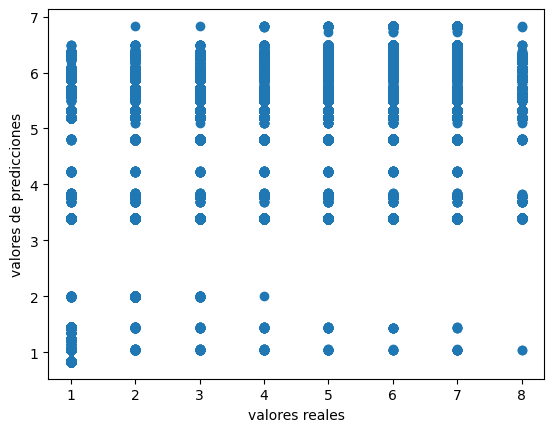

In [149]:
plt.scatter(y_test, y_pre)
plt.xlabel("valores reales")
plt.ylabel("valores de predicciones")
plt.show()

In [150]:
print(f"Coeficiente de Determinación R²: {r2}")

Coeficiente de Determinación R²: 0.2786641809385646
